## numpy 速成教程
### by liupengyuan[at]pku.edu.cn
参考资料：
- https://docs.scipy.org/doc/numpy-dev/user/quickstart.html   
- http://github.com/jrjohansson/scientific-python-lectures

In [1]:
# 引入所有必要的模块
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.display import Image, display
import numpy as np

# numpy 简介
NumPy is the fundamental package for scientific computing with Python. It contains among other things:

- a powerful N-dimensional array object
- sophisticated (broadcasting) functions
- tools for integrating C/C++ and Fortran code
- useful linear algebra, Fourier transform, and random number capabilities

（from Wikipedia）

- Tensor is a numpy.array object in tensorflow(python version).
- TensorFlow is an open-source software library for dataflow programming across a range of tasks. It is a symbolic math library, and also used for machine learning applications such as neural networks.[3] It is used for both research and production at Google.

** 1. Array and the axis in numpy **
- In the numpy package the terminology used for vectors, matrices and higher-dimensional data sets is array.
- Understanding the idea of an axis is crucial in working with data.
- Axis of an array allows you to index and access values in a particular dimension.
- In Numpy dimensions are called axes.
- For example, in deep learning, you will often work with 4-dimensional and 5-dimensional arrays (also called tensors).
Below are 1D, 2D and 3D arrays.

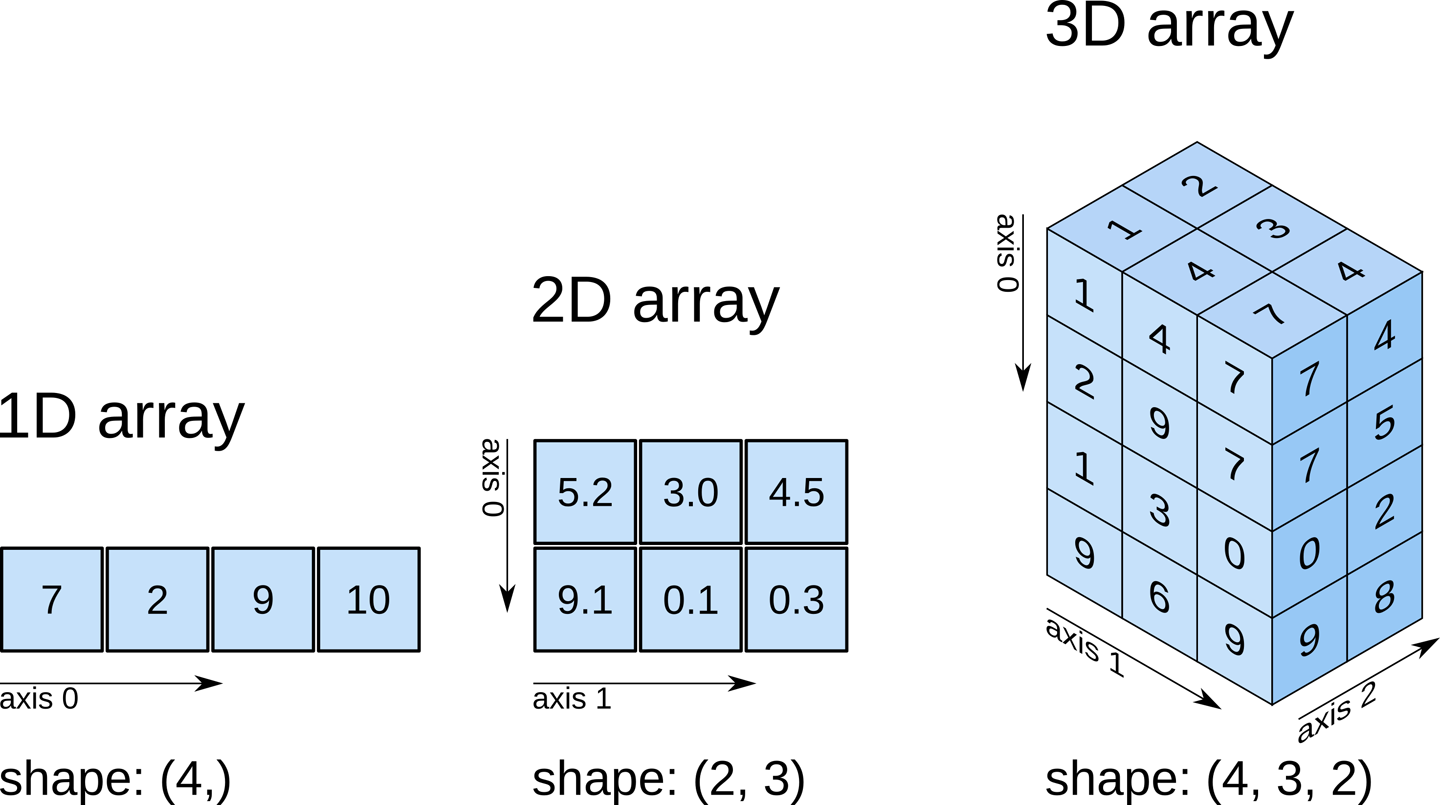

In [2]:
display(Image(filename='figures/axes.png', width=720))

可以这样想象及可视化更高维度的数组：
- 4维数组可以想象成一个向量，其中每一个元素是一个3维数组。
- 5维数组可以想象成一个矩阵，其中每一个元素是一个3维数组。
- 6维数组可以想象成一个3维数组，其中每一个元素是一个3维数组。

更高维度的，可以依次类推进行想象及可视化。

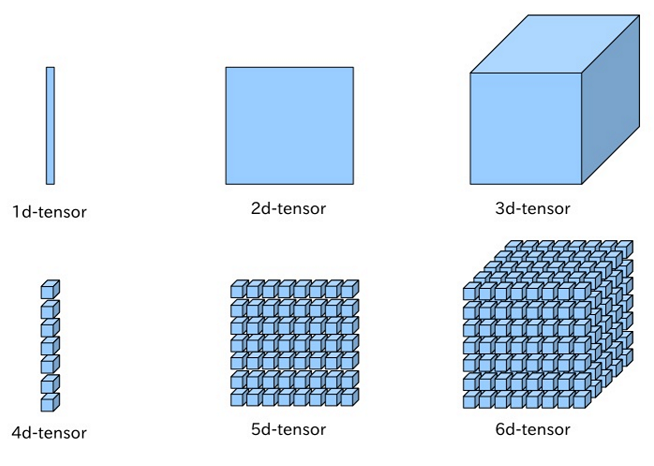

In [3]:
display(Image(filename='figures/tensors.png', width=720))

**2. 创建array及array基本特性**

主要创建方式：
- 由python的list或tuple创建
- 由numpy中函数如arange及linspace创建
- 在文件读入时直接创建

**2.1 由list/tuple创建**

In [4]:
v = np.array([1,2,3,4])
v

array([1, 2, 3, 4])

一维list对应一维array

In [5]:
M = np.array([[1, 2], [3, 4]])
M

array([[1, 2],
       [3, 4]])

Matrix(矩阵)，也即2维数组，对应二维list

In [6]:
type(v), type(M)

(numpy.ndarray, numpy.ndarray)

利用type()函数，可知v,M是numpy中的ndarray类型(n dimension array)

In [7]:
v.shape

(4,)

In [8]:
v.size

4

In [9]:
M.shape

(2, 2)

In [10]:
M.size

4

- 利用shape属性可查看数组形状(各维度)
- 利用size属性可查看数组大小(元素个数)

In [11]:
M.itemsize

4

每个元素字节数

In [12]:
M.nbytes

16

总字节数(number of bytes)

In [13]:
M.ndim

2

数组维数

In [14]:
M.dtype

dtype('int32')

- 利用dtype(data type)属性，可查看数组内元素类型
- 与python内置的list，tuple等对象不同，ndarray数组内元素必须是同一个类型(如：M[0,0] = 'h'，则将会出现错误)

In [15]:
M = np.array([[1, 2], [3, 4]], dtype=complex)
M

array([[ 1.+0.j,  2.+0.j],
       [ 3.+0.j,  4.+0.j]])

- array中元素的数据类型，在定义该数组时确定
- 可在定义时，使用dtype参数，显式指定元素类型
- 常用数据类型: int, float, complex, bool, object
- 也可以直接指定数据类型的位(精度): int64, int16, float64, complex32
- python内置的list，tuple中的数据类型是动态绑定的
- list及tuple不支持矩阵运算函数
- 利用numpy的array矩阵运算函数进行计算，要比python内置的list, tuple等类型做相同的计算性能有质的提高

In [16]:
M.astype(float)

D:\Anaconda\lib\site-packages\ipykernel\__main__.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


array([[ 1.,  2.],
       [ 3.,  4.]])

元素类型可以由astype()函数改变

**2.2 由numpy内置函数创建**

In [17]:
x = np.arange(0, 10, 1) #:start, stop, step
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

依旧是左闭右开[)

In [18]:
x = np.arange(-1, 1, 0.2)
x

array([ -1.00000000e+00,  -8.00000000e-01,  -6.00000000e-01,
        -4.00000000e-01,  -2.00000000e-01,  -2.22044605e-16,
         2.00000000e-01,   4.00000000e-01,   6.00000000e-01,
         8.00000000e-01])

In [19]:
x = np.linspace(0, 10, 25)#:start, end, number
x

array([  0.        ,   0.41666667,   0.83333333,   1.25      ,
         1.66666667,   2.08333333,   2.5       ,   2.91666667,
         3.33333333,   3.75      ,   4.16666667,   4.58333333,
         5.        ,   5.41666667,   5.83333333,   6.25      ,
         6.66666667,   7.08333333,   7.5       ,   7.91666667,
         8.33333333,   8.75      ,   9.16666667,   9.58333333,  10.        ])

- linspace()是包含两侧端点的
- 包含两侧端点，在其中均匀取number个点(当number=1时，取左侧端点)，缺省为number = 50

In [20]:
xe = np.logspace(0, 10, 25, base=np.e)
xe

array([  1.00000000e+00,   1.51689680e+00,   2.30097589e+00,
         3.49034296e+00,   5.29449005e+00,   8.03119500e+00,
         1.21824940e+01,   1.84795861e+01,   2.80316249e+01,
         4.25210820e+01,   6.45000931e+01,   9.78399845e+01,
         1.48413159e+02,   2.25127446e+02,   3.41495101e+02,
         5.18012825e+02,   7.85771994e+02,   1.19193502e+03,
         1.80804241e+03,   2.74261375e+03,   4.16026201e+03,
         6.31068811e+03,   9.57266257e+03,   1.45207412e+04,
         2.20264658e+04])

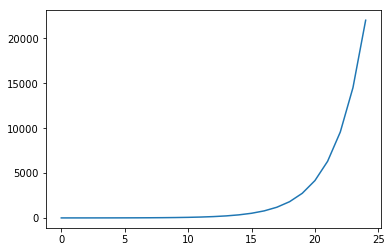

In [21]:
plt.plot(xe);

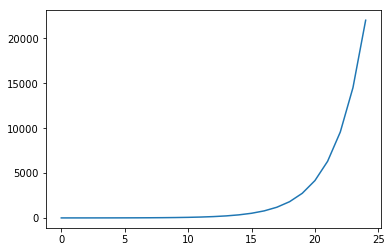

In [22]:
plt.plot(np.exp(x));

- 可以直观的解释logspace()函数，其中base参数可以指定任意合法的底

In [23]:
x = np.random.rand(25)
x

array([ 0.18337257,  0.63380606,  0.38995696,  0.16164304,  0.6468163 ,
        0.01388857,  0.2620011 ,  0.58901649,  0.69054286,  0.03078337,
        0.7048618 ,  0.64473979,  0.36315537,  0.00539391,  0.37432821,
        0.15796796,  0.80564939,  0.80824261,  0.89574276,  0.65957744,
        0.88529726,  0.45066723,  0.59449983,  0.18279727,  0.82879779])

利用numpy的random下的rand()函数，得到在[0,1]之间的随机数1维数组(随机数以均匀分布的方式生成，分布的均值为0.5)

In [24]:
x= np.random.randn(5,5)
x

array([[ 0.33933233, -0.469771  , -2.31839629,  0.05676264,  0.11127693],
       [ 0.54489201,  0.46651208,  1.84016187, -1.46393508,  1.01564912],
       [ 0.48424374, -0.58979811,  0.4431372 ,  0.50543707, -1.02986282],
       [ 0.93775131,  1.02304841,  0.52626138, -0.63327381,  1.04351029],
       [-0.29030852, -1.6233196 , -0.9275113 ,  1.86146038,  0.77076014]])

利用numpy的random下的randn()函数，得到随机数2维数组(随机数以标准正态分布的方式生成，分布的期望/均值为0，方差为1)

- 在深度学习中多用于随机初始化权重/向量

In [25]:
np.eye(5)

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

单位阵

In [26]:
np.diag([2,3,4,5])

array([[2, 0, 0, 0],
       [0, 3, 0, 0],
       [0, 0, 4, 0],
       [0, 0, 0, 5]])

对角阵

In [27]:
np.diag([1,2,3,4], k=1) 

array([[0, 1, 0, 0, 0],
       [0, 0, 2, 0, 0],
       [0, 0, 0, 3, 0],
       [0, 0, 0, 0, 4],
       [0, 0, 0, 0, 0]])

带偏移量的特殊对角阵

In [28]:
np.zeros([5,5])

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

零矩阵

In [29]:
np.ones([5,5])

array([[ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.]])

全一矩阵

**2.3 读入文件时创建**

In [30]:
data = np.genfromtxt('stockholm_td_adj.dat')
data[:5]

array([[  1.80000000e+03,   1.00000000e+00,   1.00000000e+00,
         -6.10000000e+00,  -6.10000000e+00,  -6.10000000e+00,
          1.00000000e+00],
       [  1.80000000e+03,   1.00000000e+00,   2.00000000e+00,
         -1.54000000e+01,  -1.54000000e+01,  -1.54000000e+01,
          1.00000000e+00],
       [  1.80000000e+03,   1.00000000e+00,   3.00000000e+00,
         -1.50000000e+01,  -1.50000000e+01,  -1.50000000e+01,
          1.00000000e+00],
       [  1.80000000e+03,   1.00000000e+00,   4.00000000e+00,
         -1.93000000e+01,  -1.93000000e+01,  -1.93000000e+01,
          1.00000000e+00],
       [  1.80000000e+03,   1.00000000e+00,   5.00000000e+00,
         -1.68000000e+01,  -1.68000000e+01,  -1.68000000e+01,
          1.00000000e+00]])

- CSV (comma-separated values) 
- TSV (tab-separated values)

这两种形式存放的文件可以直接利用genfromtxt()函数读入并自动成为array类型。

In [31]:
data.shape

(77431, 7)

- 可视为有77431个样本的数据集(stockholm的温度)

In [32]:
M = np.random.rand(3,3)
M

array([[ 0.19719779,  0.50034802,  0.04292904],
       [ 0.37833544,  0.53431877,  0.17319566],
       [ 0.69307307,  0.38253128,  0.8481774 ]])

In [33]:
np.savetxt("random-matrix.csv", M)
!type random-matrix.csv

1.971977931284261132e-01 5.003480170396453763e-01 4.292904207508307923e-02
3.783354385509419826e-01 5.343187731139253938e-01 1.731956591680439139e-01
6.930730680553011114e-01 3.825312826210788275e-01 8.481774049123789183e-01


- 利用savetxt()函数，将array存入csv格式文件
- windows下，!type 文件名来查看文件

In [34]:
np.savetxt("random-matrix.csv", M, fmt='%.5f')
!type random-matrix.csv

0.19720 0.50035 0.04293
0.37834 0.53432 0.17320
0.69307 0.38253 0.84818


利用savetxt()函数的fmt参数，控制保存精度

In [35]:
np.save("random-matrix.npy", M)

In [36]:
np.load("random-matrix.npy")

array([[ 0.19719779,  0.50034802,  0.04292904],
       [ 0.37833544,  0.53431877,  0.17319566],
       [ 0.69307307,  0.38253128,  0.8481774 ]])

如果不需要利用编辑器来查看保存文件的内容，也可以利用save()及load()函数存取array为npy格式。

**3. 数组基本操作**

**3.1 索引及切片**

In [37]:
v

array([1, 2, 3, 4])

In [38]:
v[0]

1

In [39]:
M

array([[ 0.19719779,  0.50034802,  0.04292904],
       [ 0.37833544,  0.53431877,  0.17319566],
       [ 0.69307307,  0.38253128,  0.8481774 ]])

In [40]:
M[1,1]

0.53431877311392539

In [41]:
M[1]

array([ 0.37833544,  0.53431877,  0.17319566])

取第0轴的第1行

In [42]:
M[1,:]

array([ 0.37833544,  0.53431877,  0.17319566])

M[1,:]与M[1]是一样的功能。完整格式为M[a,b]，当只有M[a]时，即在0轴a行上，其他维度所有值均被选择

In [43]:
M[:,1]

array([ 0.50034802,  0.53431877,  0.38253128])

第1列，即0轴方向元素均选取，1轴方向取第1列

In [44]:
M[1,0] = 1
M

array([[ 0.19719779,  0.50034802,  0.04292904],
       [ 1.        ,  0.53431877,  0.17319566],
       [ 0.69307307,  0.38253128,  0.8481774 ]])

In [45]:
M[1,:] = 2
M[:,2] = 10
M

array([[  0.19719779,   0.50034802,  10.        ],
       [  2.        ,   2.        ,  10.        ],
       [  0.69307307,   0.38253128,  10.        ]])

In [46]:
v

array([1, 2, 3, 4])

In [47]:
v[-1]

4

In [48]:
v[-3:]

array([2, 3, 4])

In [49]:
v[1:3]

array([2, 3])

In [50]:
v[1:3] = [5,7]
v

array([1, 5, 7, 4])

- 切片与python序列切片类似，但是切片赋值时，需要赋值相同个数的元素

In [51]:
A = np.array([[n + m * 10 for n in range(5)] for m in range(5)]) 
A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

一样可以使用类似列表解析的方法

In [52]:
A[1:4, 1:4]

array([[11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

取矩阵中的一个区域

**3.2 花式索引(Fancy indexing)**

In [53]:
A = np.random.randn(5,5)
A

array([[ 0.16244096,  0.34255333, -0.14172284, -0.37557189, -0.69059278],
       [ 0.73186471, -1.78577639,  1.49461548, -1.11373539, -0.83390612],
       [ 1.05907617, -0.53160463,  0.45099669,  0.62496865,  1.27006929],
       [-0.60160429, -0.17286343,  0.06719654,  0.58424981, -1.29432354],
       [ 0.05082751, -1.25291248,  1.43629003,  1.44186539, -0.07157329]])

In [54]:
row_indices = [1, 2, 3]
A[row_indices] 

array([[ 0.73186471, -1.78577639,  1.49461548, -1.11373539, -0.83390612],
       [ 1.05907617, -0.53160463,  0.45099669,  0.62496865,  1.27006929],
       [-0.60160429, -0.17286343,  0.06719654,  0.58424981, -1.29432354]])

In [55]:
col_indices = [1, 2, -1] 
A[row_indices, col_indices] 

array([-1.78577639,  0.45099669, -1.29432354])

In [56]:
A = np.arange(0,10,0.5)
A

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5])

In [57]:
indices = np.array([[2,3],[7,8]])
A[indices]

array([[ 1. ,  1.5],
       [ 3.5,  4. ]])

还可以利用array对象作为索引进行数据选择，当索引是二维array时，选择结果的array的维度与索引array维度相同

In [58]:
B = np.array([n for n in range(6)])
B

array([0, 1, 2, 3, 4, 5])

In [59]:
mask = B >= 3
mask

array([False, False, False,  True,  True,  True], dtype=bool)

array类型可以直接与数字进行逻辑比较，返回一个元素都是布尔值的array

In [60]:
B[mask]

array([3, 4, 5])

布尔值array可以作为同样维度大小的array的蒙版/掩码，以屏蔽一些元素(对象False位置)

In [61]:
A = np.arange(0,10,0.5)
A

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5])

In [62]:
mask = np.logical_and(A>5, A<10)
mask

array([False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True], dtype=bool)

logical_and()来进行array的逻辑与运算

In [63]:
A[mask]

array([ 5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5])

利用mask进行数据选择

In [64]:
A[[1,2,3]] = 9,9,9
A

array([ 0. ,  9. ,  9. ,  9. ,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5])

可以直接对选择的数据进行赋值

**where**

In [65]:
mask

array([False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True], dtype=bool)

In [66]:
indices = np.where(mask)
indices

(array([11, 12, 13, 14, 15, 16, 17, 18, 19], dtype=int64),)

利用where()函数，取得mask数组选取值的索引

In [67]:
A

array([ 0. ,  9. ,  9. ,  9. ,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5])

In [68]:
A[indices]

array([ 5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5])

与直接使用mask进行数据选择的效果相同

**diag**

In [69]:
A=np.random.randn(5,5)
A

array([[-0.14083334,  1.35983178, -1.0715684 , -0.7408125 , -0.81333176],
       [-1.96594885,  0.8182639 ,  0.24237043,  1.34791836, -0.21743733],
       [-2.01708277, -0.39736534,  0.82187546,  0.10467931, -0.40930368],
       [ 0.21928891,  1.91806957, -1.61350818,  0.59275986,  0.52594918],
       [-1.28033566, -0.44402051,  1.85905357,  0.60691264,  1.42749162]])

In [70]:
np.diag(A)

array([-0.14083334,  0.8182639 ,  0.82187546,  0.59275986,  1.42749162])

利用diag()函数，取A的对角(默认为左上开始)

In [71]:
np.diag(A, 1)

array([ 1.35983178,  0.24237043,  0.10467931,  0.52594918])

可以进行偏移后再选取对角元素

**4. 线性代数**

在数值计算以及深度学习中，向量化是非常关键的步骤，要尽量以向量进行表示与运算。

**4.1 一般操作**

In [72]:
v1 = np.arange(0, 5)
v1

array([0, 1, 2, 3, 4])

In [73]:
v1*10

array([ 0, 10, 20, 30, 40])

向量乘以标量，结果是每个元素都乘以标量

In [74]:
v1**3

array([ 0,  1,  8, 27, 64], dtype=int32)

向量进行指数运算，结果是每个元素指数运算

In [75]:
v1*v1

array([ 0,  1,  4,  9, 16])

向量*向量，结果是两个向量中对应的元素相乘

In [76]:
v1**v1

array([  1,   1,   4,  27, 256], dtype=int32)

向量**向量，结果是对应元素进行指数运算

In [77]:
A = np.arange(25).reshape(5,5)
A

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [78]:
A*10

array([[  0,  10,  20,  30,  40],
       [ 50,  60,  70,  80,  90],
       [100, 110, 120, 130, 140],
       [150, 160, 170, 180, 190],
       [200, 210, 220, 230, 240]])

矩阵乘以标量，结果是每个元素乘以标量

In [79]:
A.shape, v1.shape

((5, 5), (5,))

In [80]:
A @ A

array([[ 150,  160,  170,  180,  190],
       [ 400,  435,  470,  505,  540],
       [ 650,  710,  770,  830,  890],
       [ 900,  985, 1070, 1155, 1240],
       [1150, 1260, 1370, 1480, 1590]])

矩阵点乘，与线性代数中矩阵点乘相同(python3.6或更高可用@)

In [81]:
A @ v1

array([ 30,  80, 130, 180, 230])

矩阵与向量点乘

In [82]:
v1 @ A

array([150, 160, 170, 180, 190])

点乘时，一维向量既可以作为行向量又可以作为列向量

In [83]:
v1 @ v1

30

向量点乘

In [84]:
A.dot(A)

array([[ 150,  160,  170,  180,  190],
       [ 400,  435,  470,  505,  540],
       [ 650,  710,  770,  830,  890],
       [ 900,  985, 1070, 1155, 1240],
       [1150, 1260, 1370, 1480, 1590]])

对低版本的python，也可以利用点乘函数dot()

In [85]:
A.T

array([[ 0,  5, 10, 15, 20],
       [ 1,  6, 11, 16, 21],
       [ 2,  7, 12, 17, 22],
       [ 3,  8, 13, 18, 23],
       [ 4,  9, 14, 19, 24]])

二维数组转置

**4.2 广播(Broadcasting)**

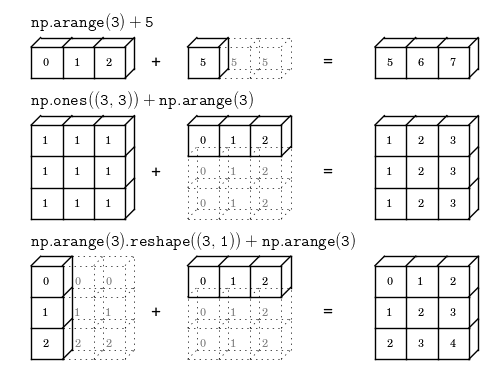

In [86]:
display(Image(filename='figures/broadcast1.png', width=720))

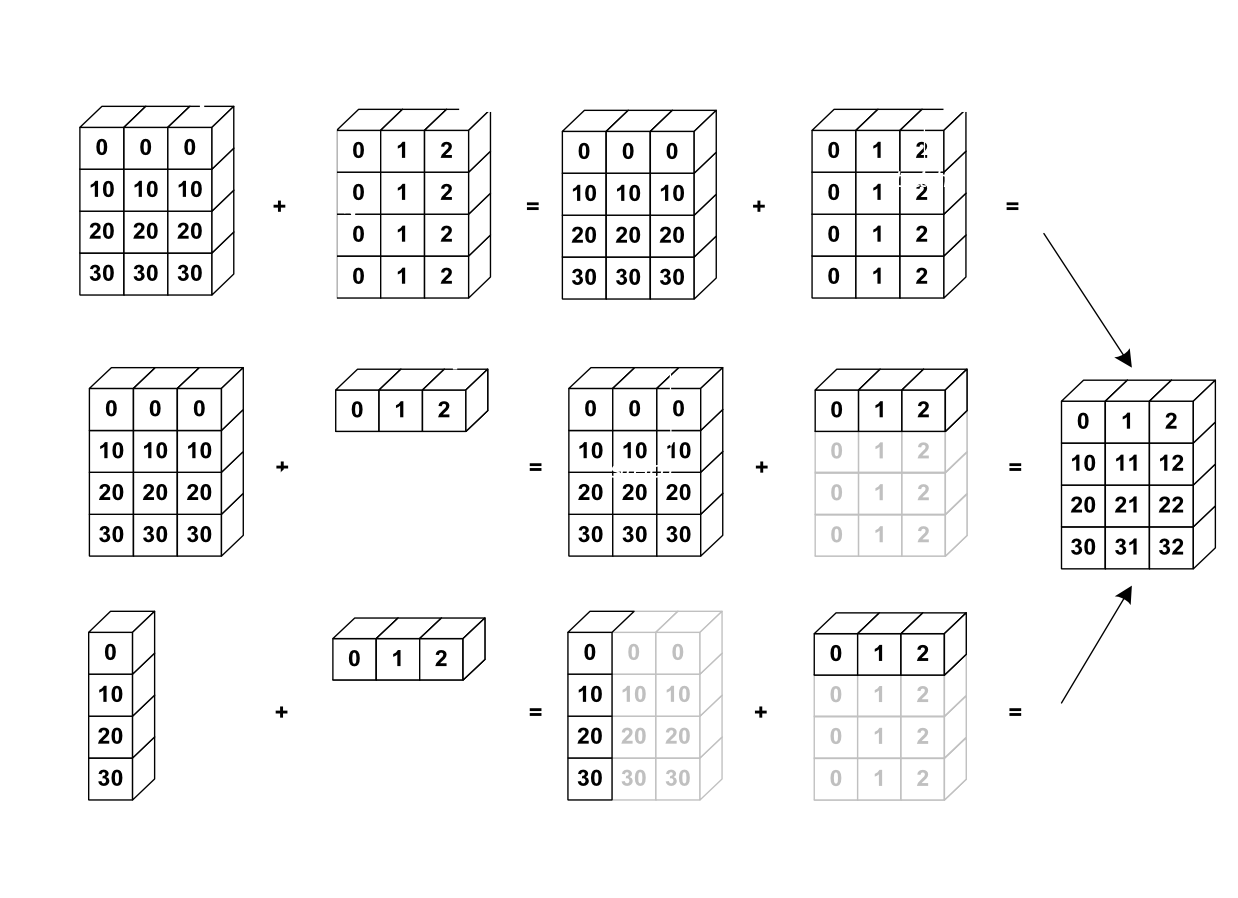

In [87]:
display(Image(filename='figures/broadcast2.png', width=720))

In [88]:
A

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [89]:
A+10

array([[10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34]])

In [90]:
v1

array([0, 1, 2, 3, 4])

In [91]:
A+v1

array([[ 0,  2,  4,  6,  8],
       [ 5,  7,  9, 11, 13],
       [10, 12, 14, 16, 18],
       [15, 17, 19, 21, 23],
       [20, 22, 24, 26, 28]])

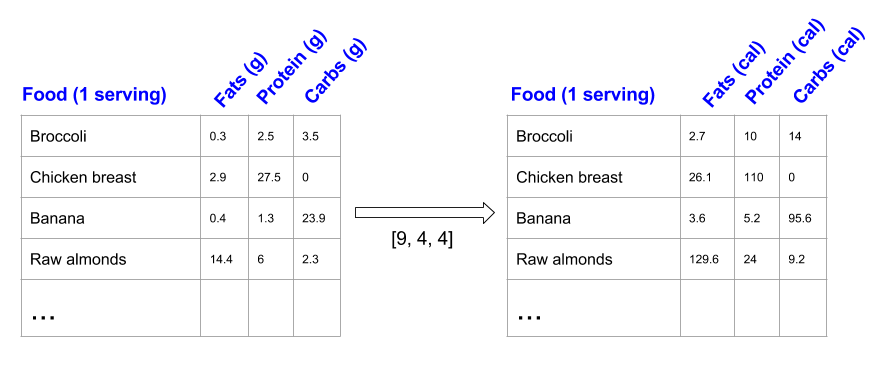

In [92]:
display(Image(filename='figures/calories.png', width=720))

In [93]:
# 基于非广播的方式进行计算
macros = np.array([
  [0.3, 2.5, 3.5],
  [2.9, 27.5, 0],
  [0.4, 1.3, 23.9],
  [14.4, 6, 2.3]])

# 创建一个形状与macros相同的全零矩阵
result = np.zeros_like(macros)

cal_per_macro = np.array([9, 4, 4])

#对0轴循环，每行向量进行向量相乘
for i in range(macros.shape[0]):
    result[i, :] = macros[i, :] * cal_per_macro
    
result

array([[   2.7,   10. ,   14. ],
       [  26.1,  110. ,    0. ],
       [   3.6,    5.2,   95.6],
       [ 129.6,   24. ,    9.2]])

In [94]:
macros*cal_per_macro

array([[   2.7,   10. ,   14. ],
       [  26.1,  110. ,    0. ],
       [   3.6,    5.2,   95.6],
       [ 129.6,   24. ,    9.2]])

矩阵与向量相乘可以直接利用广播方式，方法简洁快速

**4.3 Matrix类型**

以上运算的规律无论是向量和矩阵均为array类型，numpy也提供了基于一般线性代数运算规则的Matrix

In [95]:
M = np.matrix(A)
M

matrix([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24]])

利用matrix()函数可将array对象或list，tuple对象转换为matirx对象。

In [96]:
v = np.matrix(v1).T 
v

matrix([[0],
        [1],
        [2],
        [3],
        [4]])

In [97]:
v.shape

(5, 1)

转置后，v为一个列向量

In [98]:
M * v

matrix([[ 30],
        [ 80],
        [130],
        [180],
        [230]])

矩阵乘以向量

In [99]:
v.T * v

matrix([[30]])

向量内积

In [100]:
M * M

matrix([[ 150,  160,  170,  180,  190],
        [ 400,  435,  470,  505,  540],
        [ 650,  710,  770,  830,  890],
        [ 900,  985, 1070, 1155, 1240],
        [1150, 1260, 1370, 1480, 1590]])

矩阵相乘

In [101]:
M = np.matrix([[2,3],[5,5]])
np.linalg.inv(M)

matrix([[-1. ,  0.6],
        [ 1. , -0.4]])

linalg下的inv()函数，可以求矩阵的拟

In [102]:
M.I

matrix([[-1. ,  0.6],
        [ 1. , -0.4]])

更方便的是使用matrix对象的I属性来求逆

In [103]:
np.linalg.det(M)

-4.9999999999999982

可用linalg.det()来求matrix对象的行列式

**5. 数据处理**

In [104]:
data.shape

(77431, 7)

In [105]:
data[:,3].mean()    # np.mean(data[:,3])

6.1971096847515854

利用mean()函数计算第三列的均值

In [106]:
data[:,3].max()

28.300000000000001

计算最大值

In [107]:
data[:,3].min()

-25.800000000000001

最小值

In [108]:
data[:,3].sum()

479848.40000000002

求和

In [109]:
A

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [110]:
A[1].prod()

15120

求积

In [111]:
A.cumsum()

array([  0,   1,   3,   6,  10,  15,  21,  28,  36,  45,  55,  66,  78,
        91, 105, 120, 136, 153, 171, 190, 210, 231, 253, 276, 300], dtype=int32)

累加求和

In [112]:
A.max()

24

全局最大值

In [113]:
A.max(axis=0)

array([20, 21, 22, 23, 24])

求0轴方向的向量的最大值

In [114]:
A.max(axis=1)

array([ 4,  9, 14, 19, 24])

求1轴方向的向量的最大值

**6. 维度变化**

In [115]:
A = np.random.randn(25)
B = A.reshape(5,5)
B

array([[-0.37743668,  0.53359374,  0.1454808 , -0.58890887,  0.15780288],
       [-0.20734565,  1.92773188, -0.15751806,  1.48274896,  1.14229955],
       [ 0.34678178,  1.21245727,  0.523016  , -0.54786618,  2.06034313],
       [ 0.01897576,  0.90174686, -1.27448633, -0.20114583,  0.02900983],
       [-1.67857605,  1.11384125,  1.1096132 , -1.09811486, -0.08093909]])

利用reshape()函数将矩阵变形

In [116]:
A.shape

(25,)

In [117]:
B.shape

(5, 5)

In [118]:
A[1:4] = 5
A

array([-0.37743668,  5.        ,  5.        ,  5.        ,  0.15780288,
       -0.20734565,  1.92773188, -0.15751806,  1.48274896,  1.14229955,
        0.34678178,  1.21245727,  0.523016  , -0.54786618,  2.06034313,
        0.01897576,  0.90174686, -1.27448633, -0.20114583,  0.02900983,
       -1.67857605,  1.11384125,  1.1096132 , -1.09811486, -0.08093909])

In [119]:
B

array([[-0.37743668,  5.        ,  5.        ,  5.        ,  0.15780288],
       [-0.20734565,  1.92773188, -0.15751806,  1.48274896,  1.14229955],
       [ 0.34678178,  1.21245727,  0.523016  , -0.54786618,  2.06034313],
       [ 0.01897576,  0.90174686, -1.27448633, -0.20114583,  0.02900983],
       [-1.67857605,  1.11384125,  1.1096132 , -1.09811486, -0.08093909]])

B只是A的一个视图(view)应用，A与B指向同一个array，因此改变A，则B也会改变，反之亦然

In [120]:
A = B.copy()
B[0,:] = 10
A

array([[-0.37743668,  5.        ,  5.        ,  5.        ,  0.15780288],
       [-0.20734565,  1.92773188, -0.15751806,  1.48274896,  1.14229955],
       [ 0.34678178,  1.21245727,  0.523016  , -0.54786618,  2.06034313],
       [ 0.01897576,  0.90174686, -1.27448633, -0.20114583,  0.02900983],
       [-1.67857605,  1.11384125,  1.1096132 , -1.09811486, -0.08093909]])

一般可利用copy()函数，制作一个副本，由于是复制了一个副本，因此B改变一般不会影响A

In [121]:
B = A.flatten()
B

array([-0.37743668,  5.        ,  5.        ,  5.        ,  0.15780288,
       -0.20734565,  1.92773188, -0.15751806,  1.48274896,  1.14229955,
        0.34678178,  1.21245727,  0.523016  , -0.54786618,  2.06034313,
        0.01897576,  0.90174686, -1.27448633, -0.20114583,  0.02900983,
       -1.67857605,  1.11384125,  1.1096132 , -1.09811486, -0.08093909])

利用flattern()函数，将高维数组降维成1维向量

In [122]:
B[:5] = 10
A

array([[-0.37743668,  5.        ,  5.        ,  5.        ,  0.15780288],
       [-0.20734565,  1.92773188, -0.15751806,  1.48274896,  1.14229955],
       [ 0.34678178,  1.21245727,  0.523016  , -0.54786618,  2.06034313],
       [ 0.01897576,  0.90174686, -1.27448633, -0.20114583,  0.02900983],
       [-1.67857605,  1.11384125,  1.1096132 , -1.09811486, -0.08093909]])

注意降维是新生成1维向量

In [123]:
a = np.array([
    [[1,2],[3,4]],
     [[2,3],[4,5]]
])
a.repeat(3)    #np.repeat(a,3)

array([1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5,
       5])

重复每个数字三次形成一维数组

In [124]:
np.tile(a, 3)  #注意，暂时不能a.tile(3)

array([[[1, 2, 1, 2, 1, 2],
        [3, 4, 3, 4, 3, 4]],

       [[2, 3, 2, 3, 2, 3],
        [4, 5, 4, 5, 4, 5]]])

每个向量内重复三次，形成的数组维度保持不变

In [125]:
a = np.array([[1,2],[3,4]])
b = np.array([[5,6]])
np.concatenate((a, b), axis=0)

array([[1, 2],
       [3, 4],
       [5, 6]])

按照0轴方向链接向量，1轴方向维度不变

In [126]:
np.concatenate((a, b.T), axis=1)

array([[1, 2, 5],
       [3, 4, 6]])

按照1轴方向链接向量，0轴方向维度不变

In [127]:
np.vstack([a,b])

array([[1, 2],
       [3, 4],
       [5, 6]])

竖向堆叠

In [128]:
np.hstack([a,b.T])

array([[1, 2, 5],
       [3, 4, 6]])

横向堆叠